# Assignment #6: Model Evaluation

Using Pima Diabetics data create a pipeline to perform any feature processing and split the data into test and training sets. Create a logistic regression model pipeline that uses the above pipeline and using grid search cross-validation using 10 folds. Search 5 different regularization strengths and 2 solvers

In [1]:
# Importing the required function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('pima_indian_data.csv')
df.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Explaratory Data Analysis

## Data visualization and exploration

In [6]:
df.shape

(768, 9)

In [63]:
df.dtypes

Number  of times pregnant       int64
Plasma glucose                  int64
Diastolic blood pressure        int64
Triceps skinfold thickness      int64
serum insulin                   int64
Body mass index               float64
Diabetes pedigree function    float64
Age                             int64
Class                           int64
dtype: object

In [64]:
df.isnull().values.any()

False

In [65]:
df.describe()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
n_true = len(df.loc[df['Class'] == True])
n_false = len(df.loc[df['Class'] == False])
print(f'Diabetic true cases :{n_true}  ')
print(f'Diabetic False cases :{n_false} ')

Diabetic true cases :268  
Diabetic False cases :500 


Text(0.5, 1.0, 'Histogram for the Pima Data')

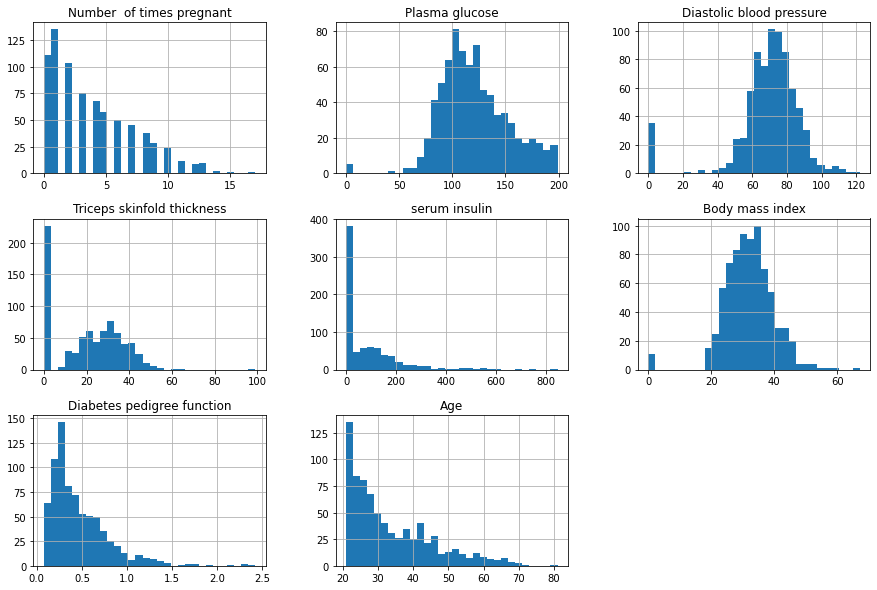

In [67]:
df[[x for x in df.columns if x != 'Class']].hist(bins=30, figsize=(15, 10))
plt.title('Histogram for the Pima Data')

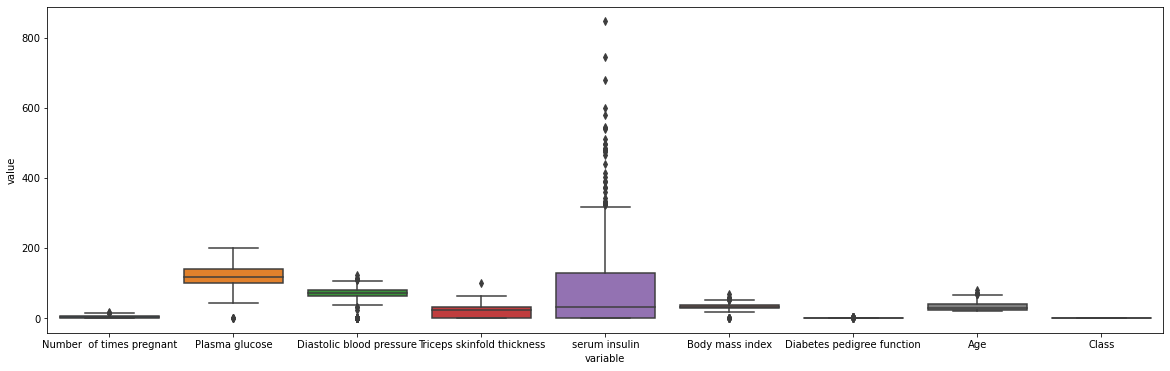

In [68]:
plt.figure(figsize=(20,6))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [71]:
df.columns

Index(['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function', 'Age',
       'Class'],
      dtype='object')

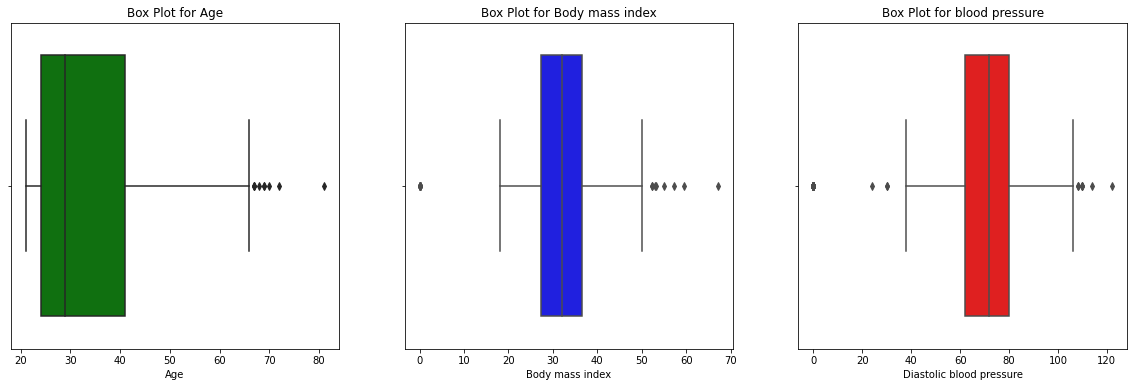

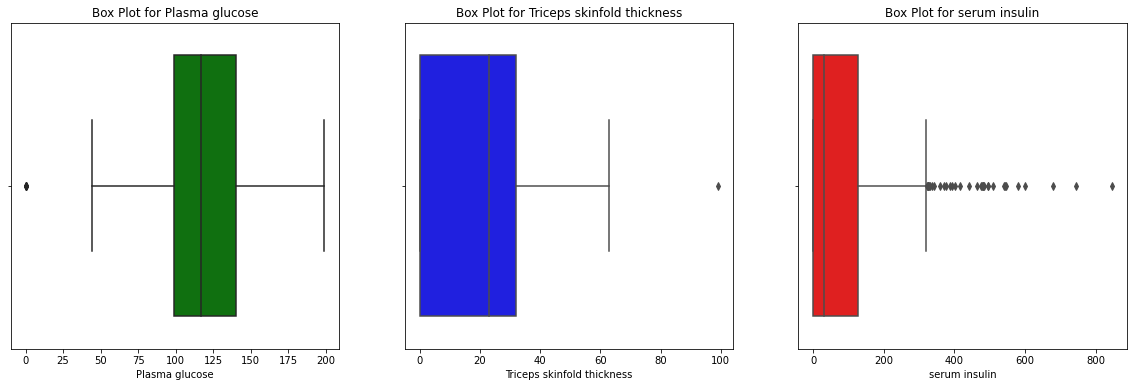

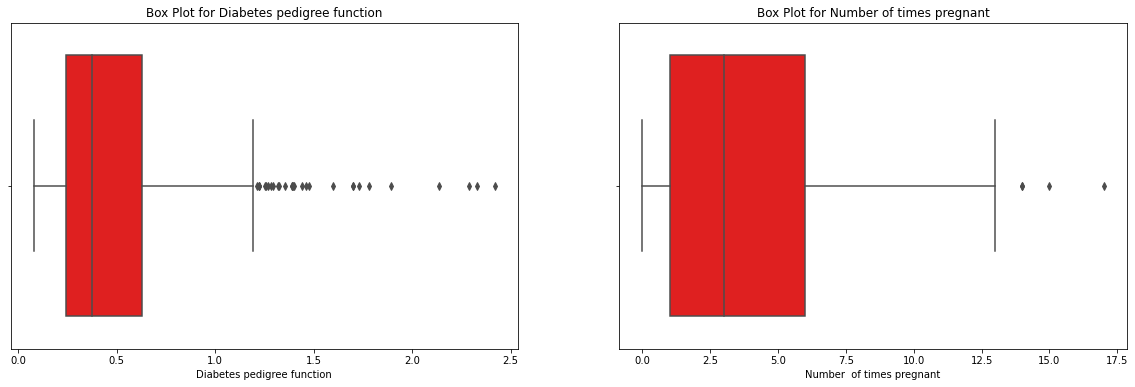

In [76]:
plt.figure(figsize=(20,6))
# subplot 1
plt.subplot(1, 3, 1)
plt.title('Box Plot for Age')
sns.boxplot(df['Age'],color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('Box Plot for Body mass index')
sns.boxplot(df['Body mass index'],color='blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('Box Plot for blood pressure')
sns.boxplot(df['Diastolic blood pressure'],color='red')

plt.figure(figsize = (20,6))
# subplot 5
plt.subplot(1, 3, 1)
plt.title('Box Plot for Plasma glucose')
sns.boxplot(df['Plasma glucose'],color='green')

plt.subplot(1, 3, 2)
plt.title('Box Plot for Triceps skinfold thickness')
sns.boxplot(df['Triceps skinfold thickness'],color='blue')

plt.subplot(1, 3, 3)
plt.title('Box Plot for serum insulin')
sns.boxplot(df['serum insulin'],color='red')

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title('Box Plot for Diabetes pedigree function')
sns.boxplot(df['Diabetes pedigree function'],color='red')

plt.subplot(1,2,2)
plt.title('Box Plot for Number of times pregnant')
sns.boxplot(df['Number  of times pregnant'],color='red')

plt.show()

In [40]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
Number of times pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plasma glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Diastolic blood pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Triceps skinfold thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Body mass index,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes pedigree function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

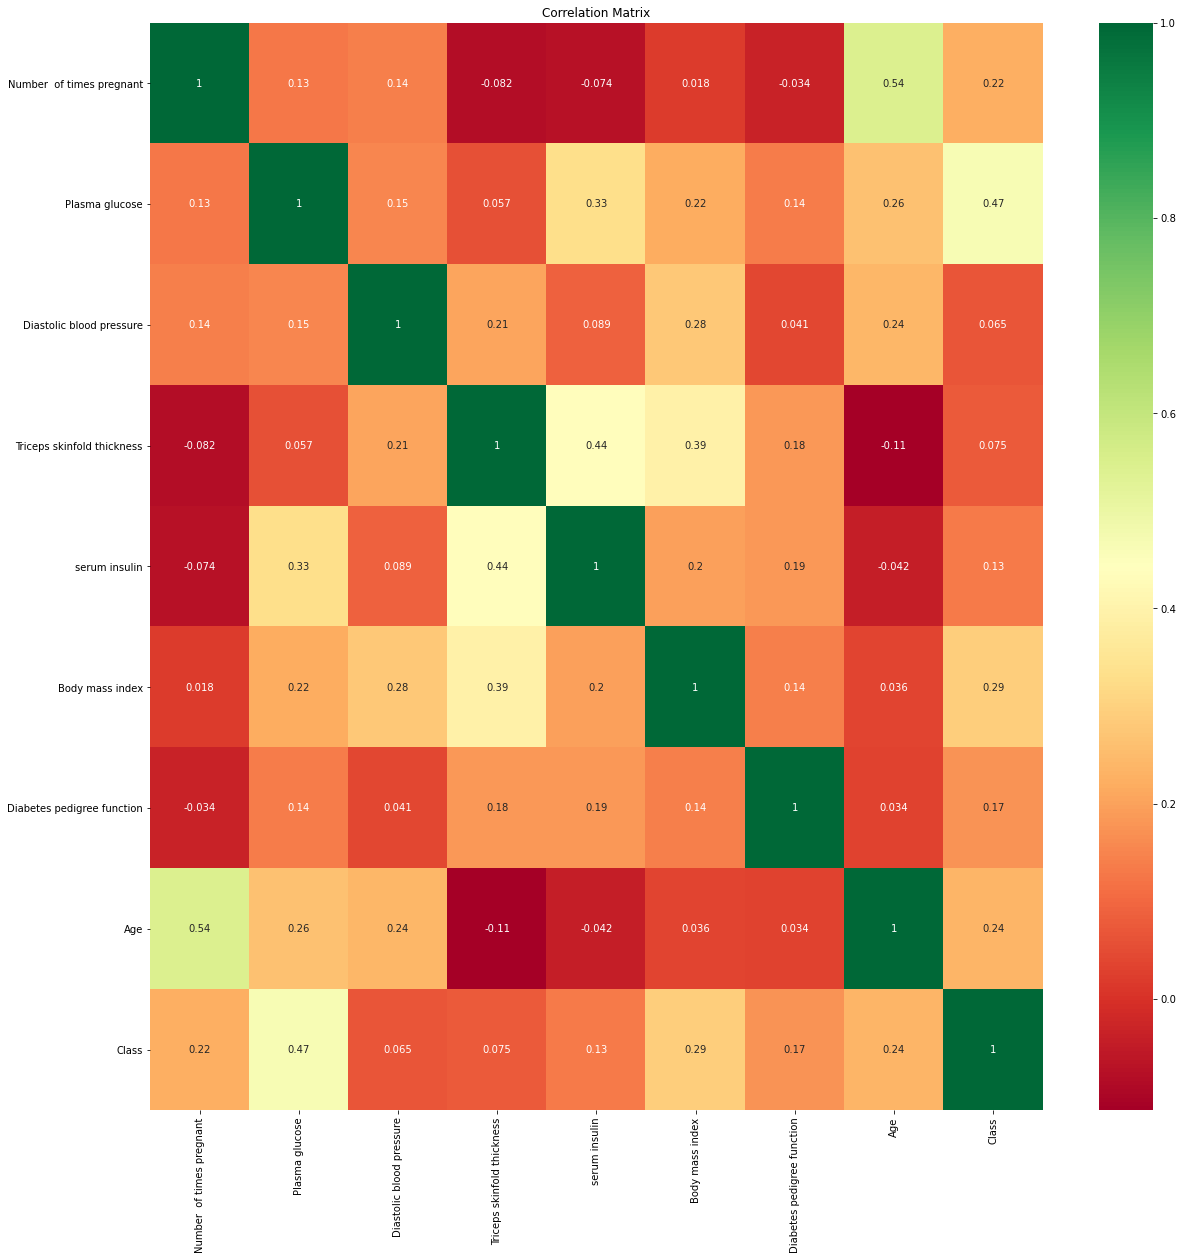

In [42]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Pair Plot')

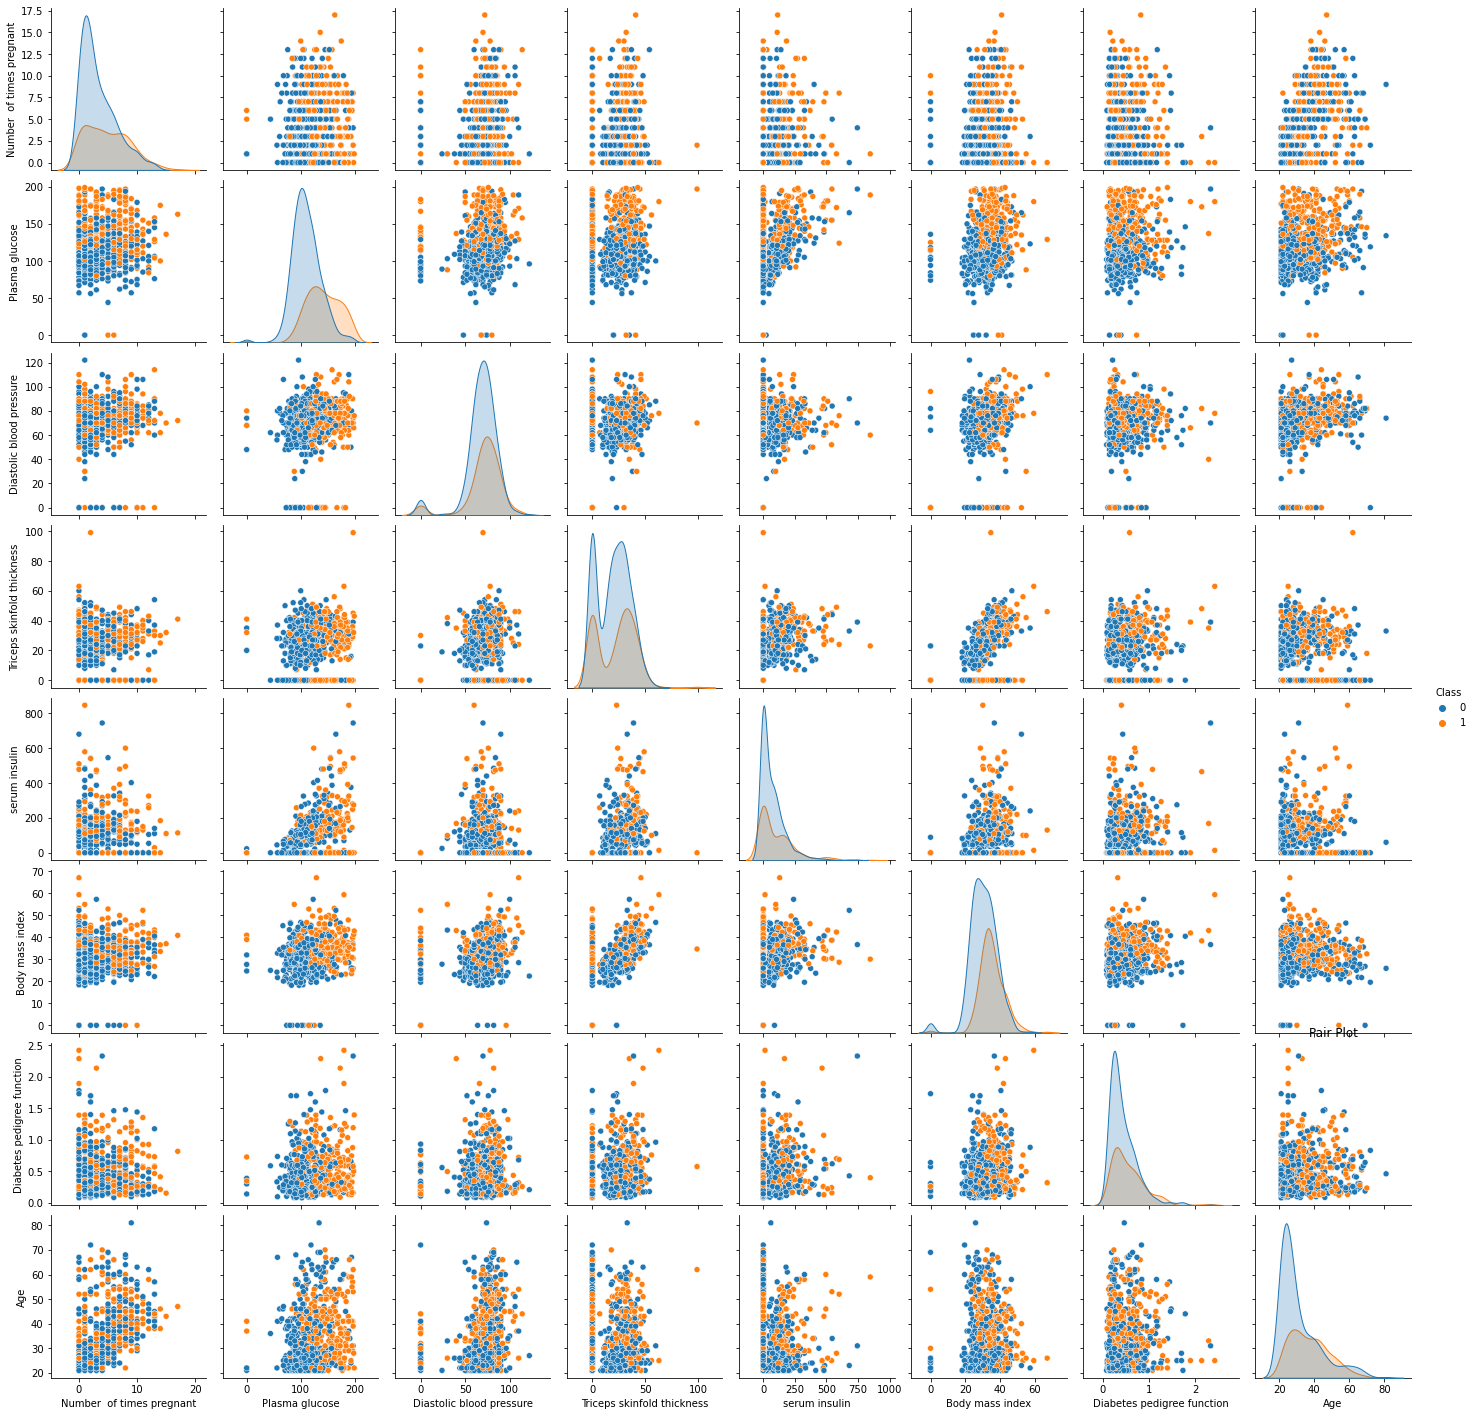

In [43]:
sns.pairplot(df, diag_kind='kde',hue='Class')
plt.title('Pair Plot')

From the above data analysis we can find the there is strong positve or negative correlation between any variables but BMI and Plasma Glucose and Age has correlation between the Class variable.

# MODELING

### Test and Train Data Split

In [92]:
from sklearn.model_selection import train_test_split

y=df.Class
X=df.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 614
Test examples: 154


## Pipeline

In [94]:
## Importing required libraries for modeling 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression